In [10]:
#import dependencies
#!pip install citipy


import numpy as np
import json
import pandas as pd
from citipy import citipy as cp
import matplotlib.pyplot as plt
import pyowm
import random
from  urllib import request as urllib_request
import datetime
import time
from math import ceil as ceiling
import csv
import os
import requests as req
from scipy.stats.stats import pearsonr

In [11]:
#set up OWM api key,  this is my API key and will probably delete before turning in

API = 'a7b199dee08529252a239b9b32b22fe8'
owm = pyowm.OWM(API)
url="http://api.openweathermap.org/data/2.5/weather?q="
units="&units=imperial"

In [12]:
# practice citipy commands

#city = cp.nearest_city(22.99, 120.21)
#print(city)             
#print(city.city_name)     # Tainan, my home town 'tainan'
#print(city.country_code)  # And the country is surely Taiwan 'tw'

In [19]:
#append lists that will only grab 500 unique cities for use in OWM analysis

cities = []
 
while len(cities) <= 20:
    latitude = random.randint(-90.00,90.00)
    longitude = random.randint(-180.00, 180.00)
    city = cp.nearest_city(latitude, longitude)
    if city not in cities:
        cities.append({
            'city code' : city,
            'city': city.city_name,
            'country': city.country_code,
            'latitude': latitude,
            'longitude': longitude,
        })
    else:
        continue
    
    #print(city)
    print(city.city_name)
    #print(city.country_code)

    
# print list of city names to ensure list of unique cities was acquired

buraydah
tual
bredasdorp
vestmannaeyjar
santa maria
attawapiskat
vaini
mayumba
teahupoo
torbay
acuna
cockburn town
lovozero
sibolga
lorengau
ushuaia
bluff
sioux lookout
kapaa
busselton
vaini
vanavara
port elizabeth
rikitea
geraldton
bluff
manvi
mar del plata
hermanus
tumannyy
provideniya
busselton
amderma
bathsheba
provideniya
luganville
punta arenas
busselton
yeppoon
port hardy
puerto ayora
atuona
kapaa
arraial do cabo
leningradskiy
mahebourg
samfya
punta arenas
hithadhoo
taolanaro
bredasdorp
taolanaro
cape town
maraa
chardara
russell
cape town
gushikawa
butaritari
albany
yongan
nikolskoye
rikitea
jamestown
kaitangata
bluff
hermanus
bluff
bathurst
hovd
tuktoyaktuk
sept-iles
esperance
nizhneyansk
kaitangata
sao felix do xingu
bethel
kapaa
rikitea
povenets
springbok
hilo
clyde river
isangel
asau
tuktoyaktuk
kodiak
barrow
amderma
januaria
ancud
grand river south east
tuatapere
hilo
catuday
new norfolk
kaitangata
punta arenas
nikolskoye
vardo
thompson
taolanaro
taolanaro
rikitea
vaini
atu

In [20]:
    
#Create dictionary using cities in city list as a key.

weatherInfo={}
    for x in cities:
        city = x['city']
        country = x['country']
        citycode = x['city code']
        latitude = x['latitude']
        longitude = x['longitude']
        cityAPI=url+city+","+country+units+"&APPID="+API
        call=req.get(cityAPI).json()
        time.sleep(1)
        for y in call:
            try:
                weatherInfo[city] = {
                    'City': city,
                    'Country':country,
                    'Citycode':citycode,
                    'Latitude':latitude,
                    'Longitude':longitude,
                    'Temperature (F)':call['main']['temp'],
                    'Wind (mph)':call['wind']['speed'],
                    'Humidity (%)':call['main']['humidity'],
                    'Cloudiness (%)':call['clouds']['all'],
                }
            except KeyError:
                continue

print(weatherInfo)

#print dictionary to determine correct function

{'buraydah': {'City': 'buraydah', 'Country': 'sa', 'Citycode': <citipy.citipy.City object at 0x1189e3080>, 'Latitude': 26, 'Longitude': 43, 'Temperature (F)': 82.4, 'Wind (mph)': 5.82, 'Humidity (%)': 34, 'Cloudiness (%)': 0}, 'tual': {'City': 'tual', 'Country': 'id', 'Citycode': <citipy.citipy.City object at 0x117c8beb8>, 'Latitude': -4, 'Longitude': 132, 'Temperature (F)': 78.06, 'Wind (mph)': 4.94, 'Humidity (%)': 100, 'Cloudiness (%)': 56}, 'bredasdorp': {'City': 'bredasdorp', 'Country': 'za', 'Citycode': <citipy.citipy.City object at 0x11909fb38>, 'Latitude': -88, 'Longitude': 21, 'Temperature (F)': 42.8, 'Wind (mph)': 1.12, 'Humidity (%)': 81, 'Cloudiness (%)': 20}, 'vestmannaeyjar': {'City': 'vestmannaeyjar', 'Country': 'is', 'Citycode': <citipy.citipy.City object at 0x117e950b8>, 'Latitude': 57, 'Longitude': -22, 'Temperature (F)': 49.35, 'Wind (mph)': 16.58, 'Humidity (%)': 96, 'Cloudiness (%)': 88}, 'santa maria': {'City': 'santa maria', 'Country': 'us', 'Citycode': <citipy.c

In [26]:
#create dataframe from two lists to match city with country code, print DF to test correct data acquired


weatherInfoDF=pd.DataFrame.from_records(weatherInfo).T
weatherInfoDF.to_csv("weatherInfoDF.csv")



weatherInfoDF2=weatherInfoDF.drop('Citycode', axis=1).drop('City', axis=1).drop('Country', axis=1).drop('Longitude', axis=1)


weatherInfoDF2.head(-1)

,Cloudiness (%),Humidity (%),Latitude,Temperature (F),Wind (mph)
acapulco,90,83,10,82.4,6.93
acuna,40,55,29,86,20.8
agadez,0,21,17,64.02,2.71
aguimes,20,73,27,71.6,25.28
ahipara,80,88,-30,58.62,14.67
ahuimanu,20,57,37,83.64,10.29
aksarka,80,84,65,34.32,5.39
alamos,0,42,28,85.08,3.83
albany,92,87,-80,53.85,16.24
ambodifototra,44,100,-17,70.95,5.39


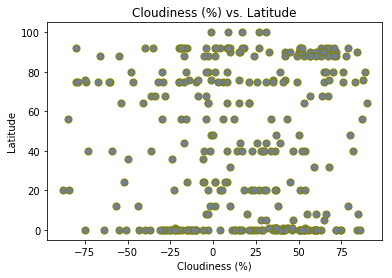

There is insignificant correlation between Cloudiness (%) and latitude, r=0.008, n=303, p=0.883. Overall, there is weak positive relationship correlation between the two variables.

We are unable to reject the null hypotheses.


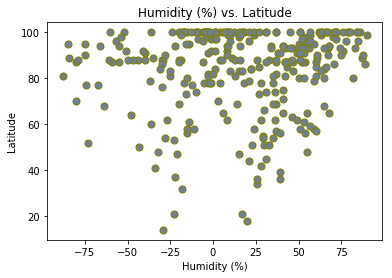

There is insignificant correlation between Humidity (%) and latitude, r=0.095, n=303, p=0.099. Overall, there is weak positive relationship correlation between the two variables.

We are unable to reject the null hypotheses.


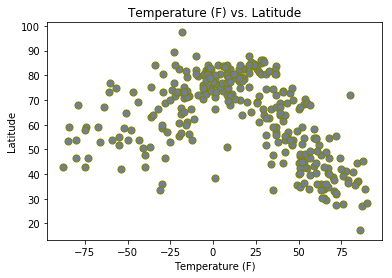

There is significant correlation between Temperature (F) and latitude, r=-0.403, n=303, p=0.0. Overall, there is weak negative relationship correlation between the two variables.

The null hypotheses is invalid, we can conclude that the higher the latitude, the Lower the Temperature (F).


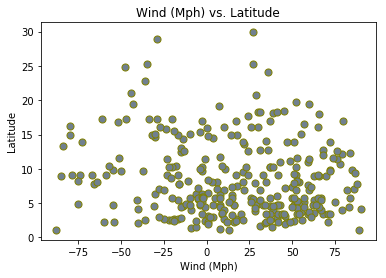

There is significant correlation between Wind (mph) and latitude, r=-0.134, n=303, p=0.019. Overall, there is weak negative relationship correlation between the two variables.

The null hypotheses is invalid, we can conclude that the higher the latitude, the Lower the Wind (mph).


In [30]:
#Analyze to determine statistical significance, print matplotlib graphs

for x in weatherInfoDF2:
    if weatherInfoDF2[x] is not weatherInfoDF2['Latitude']:
        fig=plt.figure()
        plt.scatter(weatherInfoDF2.Latitude, weatherInfoDF2[x], s=50, edgecolor='olive', c='slategrey')
        plt.title(f'%s vs. Latitude' % (x.title()))
        plt.ylabel("Latitude")
        plt.xlabel(x.title())
        PR=pearsonr(weatherInfoDF.Latitude, weatherInfoDF2[x])
        plt.savefig(x + "vs. Latitude.png")
        plt.show()
        
        def printWeather(z,w):
            if z >= 0.5:
                description = "strong positive relationship"
                direction = "higher"
            elif 0 < z < 0.5:
                description = "weak positive relationship"
                direction = "Higher"
            elif -0.5 < z < 0:
                description = "weak negative relationship"
                direction = "Lower"
            elif z <= 0.5:
                description = "strong negative relationship"
                direction = "lower"
            else:
                description = "zero"
            if w > 0.05:
                result="insignificant"
                null="We are unable to reject the null hypotheses."
            elif w < 0.05:
                result ="significant"
                null=f"The null hypotheses is invalid, we can conclude that the higher the latitude, the %s the %s." % (direction, x)
            print(f'There is %s correlation between %s and latitude, r=%s, n=%s, p=%s. Overall, there is %s correlation between the two variables.' % (result, x, round(PR[0],3), len(weatherInfoDF), round(PR[1],3), description))
            print("")
            print(null)
        printWeather(PR[0],PR[1])